In [1]:
!kaggle datasets download -d harrywang/housing


  0%|          | 0.00/400k [00:00<?, ?B/s]
100%|██████████| 400k/400k [00:00<00:00, 1.59MB/s]
100%|██████████| 400k/400k [00:00<00:00, 1.58MB/s]


In [4]:
conda install git

Solving environment: ...working... done

## Package Plan ##

  environment location: c:\Users\91979\anaconda3

  added / updated specs:
    - git


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    git-2.34.1                 |       haa95532_0        50.4 MB
    ------------------------------------------------------------
                                           Total:        50.4 MB

The following NEW packages will be INSTALLED:

  git                pkgs/main/win-64::git-2.34.1-haa95532_0




git-2.34.1           | 50.4 MB   |            |   0% 
git-2.34.1           | 50.4 MB   |            |   0% 
git-2.34.1           | 50.4 MB   |            |   1% 
git-2.34.1           | 50.4 MB   | 1          |   2% 
git-2.34.1           | 50.4 MB   | 2          |   3% 
git-2.34.1           | 50.4 MB   | 3          |   4% 
git-2.34.1           | 50.4 MB   | 4          |   5% 
git-2.34.1           |



==> WARNING: A newer version of conda exists. <==
  current version: 4.14.0
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [6]:
!unzip housing.zip && rm housing.zip

Archive:  housing.zip
  inflating: anscombe.csv            
  inflating: housing.csv             


In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [2]:
data=pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


In [5]:
lb=LabelEncoder()
data.ocean_proximity=lb.fit_transform(data.ocean_proximity)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [6]:
miss=pd.DataFrame({'Col_name':data.columns,'Missing value':[any(data[x].isnull()) for x in data.columns],
'Count':[sum(data[y].isnull()) for y in data.columns]})
miss.sort_values(by='Count',ascending=False)

,Col_name,Missing value,Count
4,total_bedrooms,True,207
0,longitude,False,0
1,latitude,False,0
2,housing_median_age,False,0
3,total_rooms,False,0
5,population,False,0
6,households,False,0
7,median_income,False,0
8,median_house_value,False,0
9,ocean_proximity,False,0


In [7]:
data.dropna(inplace=True)
data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

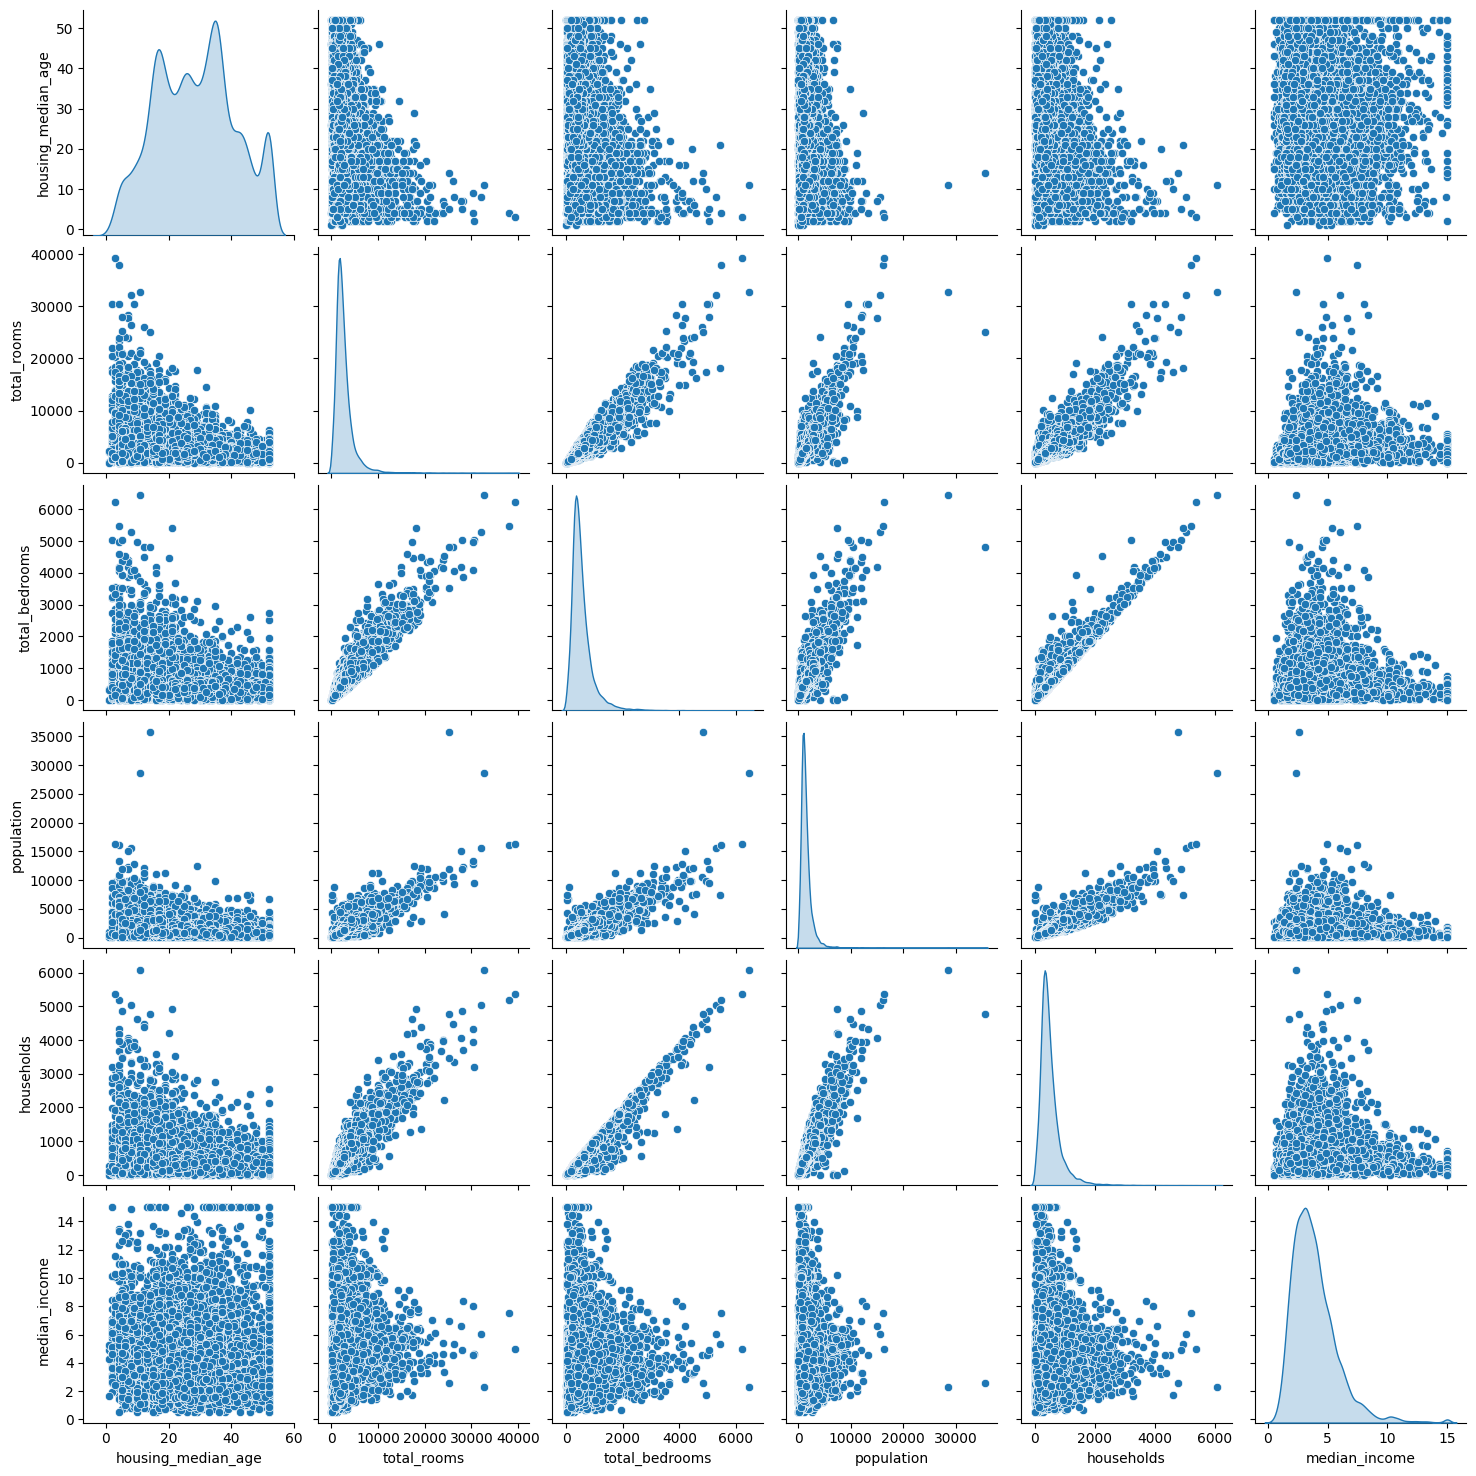

In [8]:
sns.pairplot(data[['housing_median_age','total_rooms','total_bedrooms','population','households','median_income']],diag_kind='kde')
plt.show()

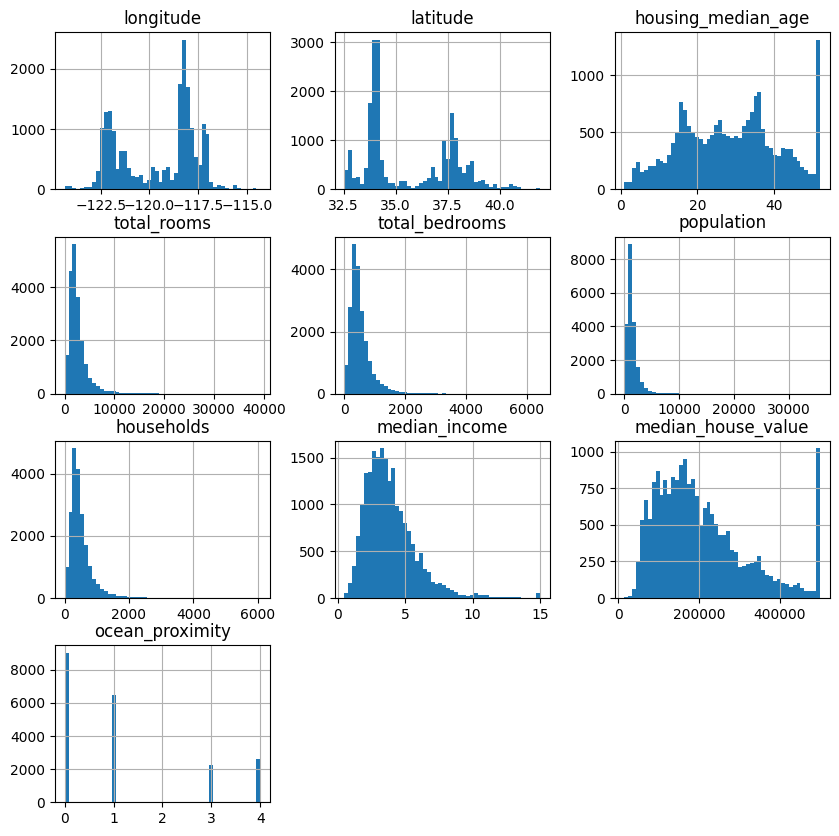

In [9]:
data.hist(bins=50,figsize=(10,10))
plt.show()

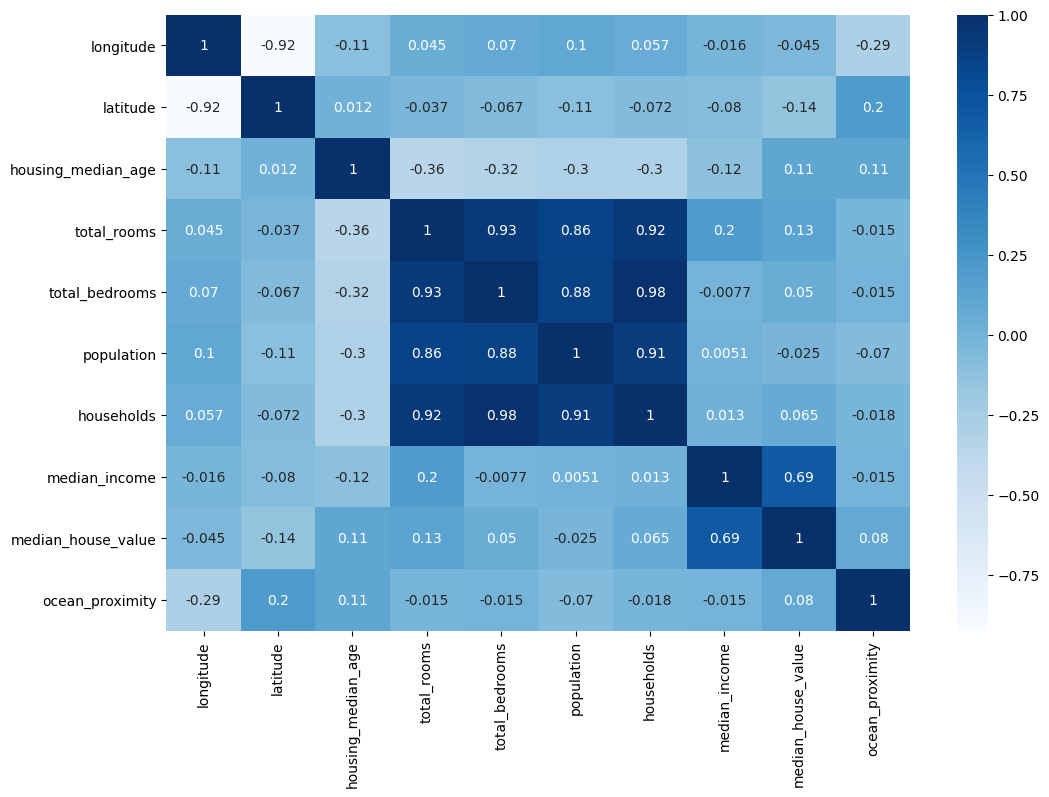

In [20]:
plt.rcParams['figure.figsize']=(12,8)
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.show()

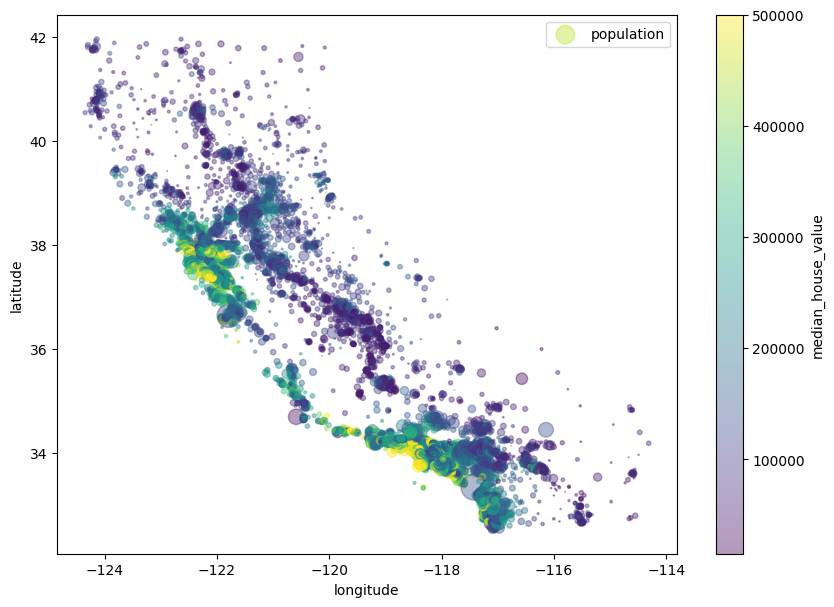

In [22]:
data.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,s=data.population/100,label='population',figsize=(10,7),c='median_house_value',colorbar=True)
plt.show()

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(data.drop('median_house_value',axis=1),data.median_house_value,test_size=0.3,random_state=101)
X_train.shape

(14303, 9)

In [27]:
def build_model():
    model=keras.Sequential([
        layers.Dense(128,activation='relu',input_shape=[len(X_train.keys())]),
        layers.Dense(128,activation='relu'),
        layers.Dense(1)
    ])

    optimizer=tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',optimizer=optimizer,metrics=['mae','mse'])

    return model

In [28]:
model=build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,921
Trainable params: 17,921
Non-trainable params: 0
_________________________________________________________________


In [29]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

EPOCHS=200

history=model.fit(X_train,Y_train,epochs=EPOCHS,validation_split=0.2,verbose=0,callbacks=[tensorflow_docs.modeling.EpochDots(20)])

c:\Users\91979\anaconda3\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]



Epoch: 0, loss:31822305280.0000,  mae:134345.0469,  mse:31822305280.0000,  val_loss:26176749568.0000,  val_mae:117225.4062,  val_mse:26176749568.0000,  
....................
Epoch: 20, loss:7562209792.0000,  mae:67122.9375,  mse:7562209792.0000,  val_loss:7601593856.0000,  val_mae:66723.9844,  val_mse:7601593856.0000,  
....................
Epoch: 40, loss:5931676672.0000,  mae:58015.2383,  mse:5931676672.0000,  val_loss:5933916672.0000,  val_mae:57933.1992,  val_mse:5933916672.0000,  
....................
Epoch: 60, loss:5105795584.0000,  mae:52755.5117,  mse:5105795584.0000,  val_loss:6357367808.0000,  val_mae:62739.5508,  val_mse:6357367808.0000,  
....................
Epoch: 80, loss:4874953728.0000,  mae:51509.4727,  mse:4874953728.0000,  val_loss:4578056192.0000,  val_mae:49415.5820,  val_mse:4578056192.0000,  
....................
Epoch: 100, loss:4723600384.0000,  mae:50677.7734,  mse:4723600384.0000,  val_loss:5325816320.0000,  val_mae:52604.3750,  val_mse:5325816320.0000,  


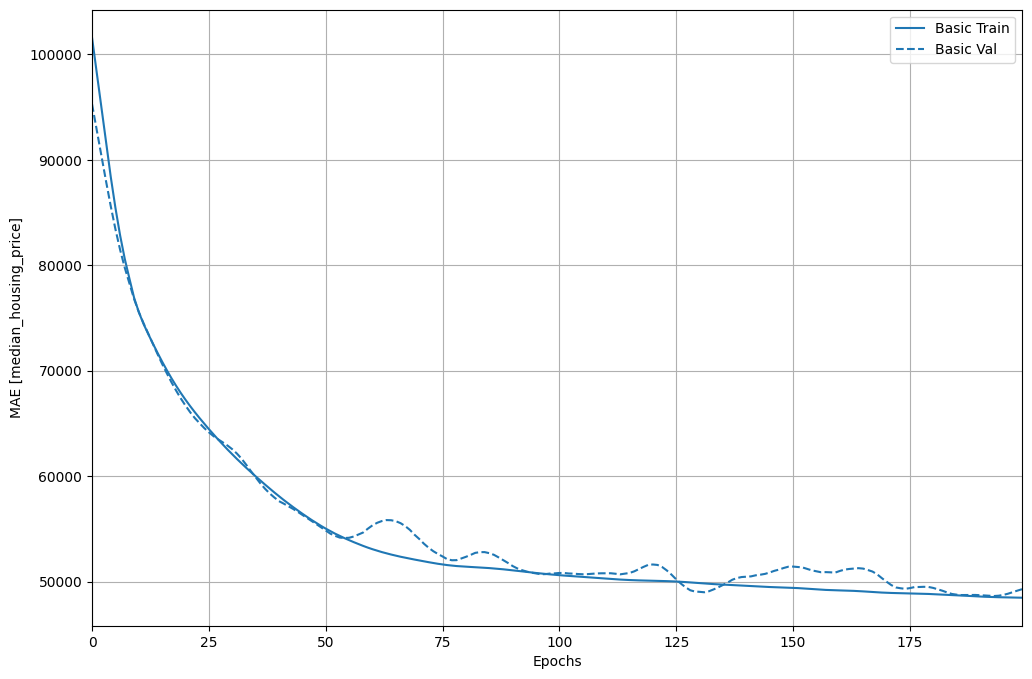

In [30]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic':history},metric='mae')

plt.ylabel('MAE [median_housing_price]')
plt.show()

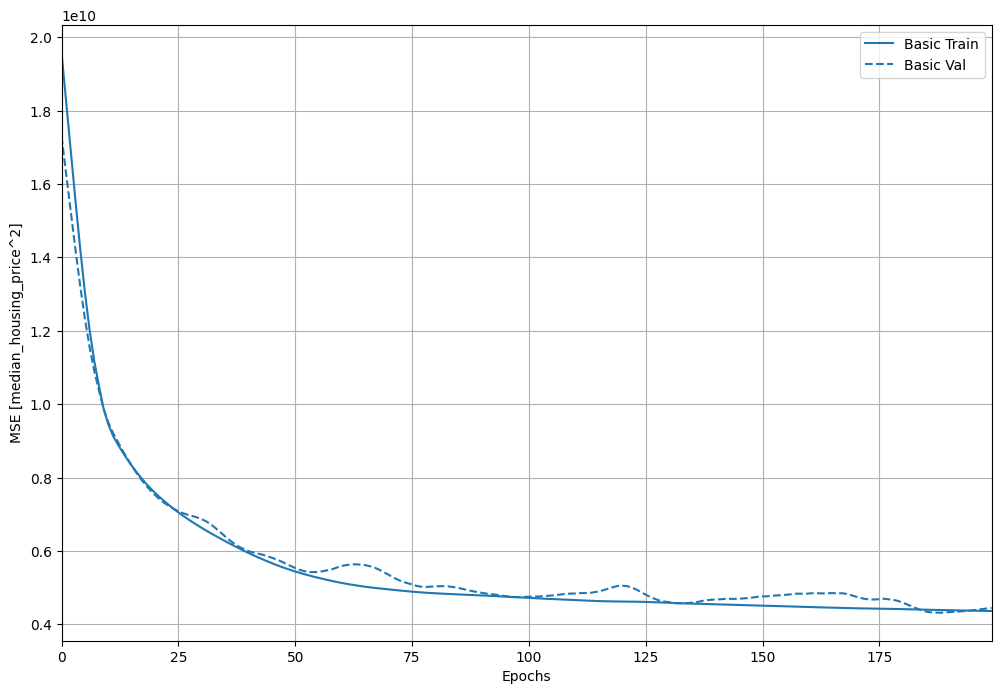

In [31]:
plotter.plot({'Basic':history},metric='mse')

plt.ylabel('MSE [median_housing_price^2]')
plt.show()

192/192 [==============================] - 0s 580us/step


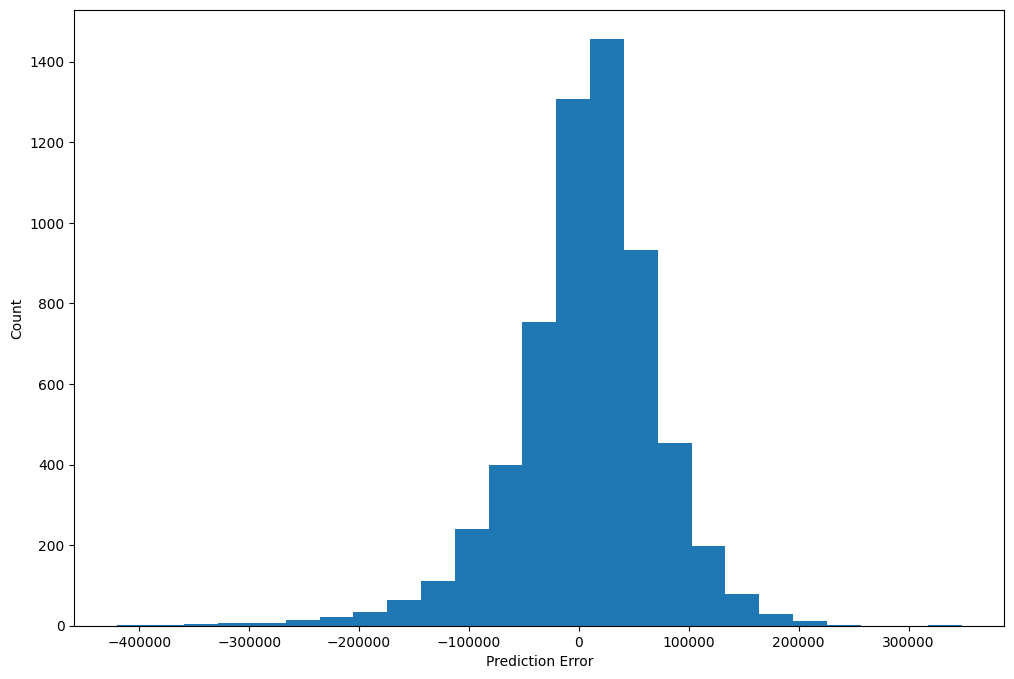

In [32]:
test_predictions = model.predict(X_test).flatten()
error=test_predictions-Y_test
plt.hist(error,bins=25)
plt.xlabel("Prediction Error")
_=plt.ylabel("Count")